In [58]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


# Caricamento dei dati
x_train_raw = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_train.npy')
y_train = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_train.npy')
x_val_raw = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_val.npy')
y_val = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_val.npy')
x_test_raw = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/x_test.npy')
y_test = np.load('/kaggle/input/cifar10-hw3/cifar_hw3/y_test.npy')

In [59]:
# Funzione per rimuovere i quadrati colorati e riempirli
def rimuovi_quadrato_colorato(img):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    maschera = np.zeros(img.shape[:2], dtype=np.uint8)

    colori_bassi = {
        "rosso":    np.array([100, 0, 0]),
        "verde":    np.array([0, 100, 0]),
        "blu":      np.array([0, 0, 100]),
        "giallo":   np.array([100, 100, 0]),
        "blu_scuro":np.array([0, 0, 50]),
    }

    colori_alti = {
        "rosso":    np.array([255, 60, 60]),
        "verde":    np.array([60, 255, 60]),
        "blu":      np.array([60, 60, 255]),
        "giallo":   np.array([255, 255, 90]),
        "blu_scuro":np.array([80, 80, 160]),
    }

    for colore in colori_bassi:
        low = colori_bassi[colore]
        high = colori_alti[colore]
        m = cv2.inRange(img, low, high)
        maschera = cv2.bitwise_or(maschera, m)

    pulita = cv2.inpaint(img, maschera, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return pulita

def pulisci_dataset(immagini):
    return np.array([rimuovi_quadrato_colorato(img) for img in immagini])

x_train_pulito = pulisci_dataset(x_train_raw)
x_val_pulito = pulisci_dataset(x_val_raw)
x_test_pulito = pulisci_dataset(x_test_raw)

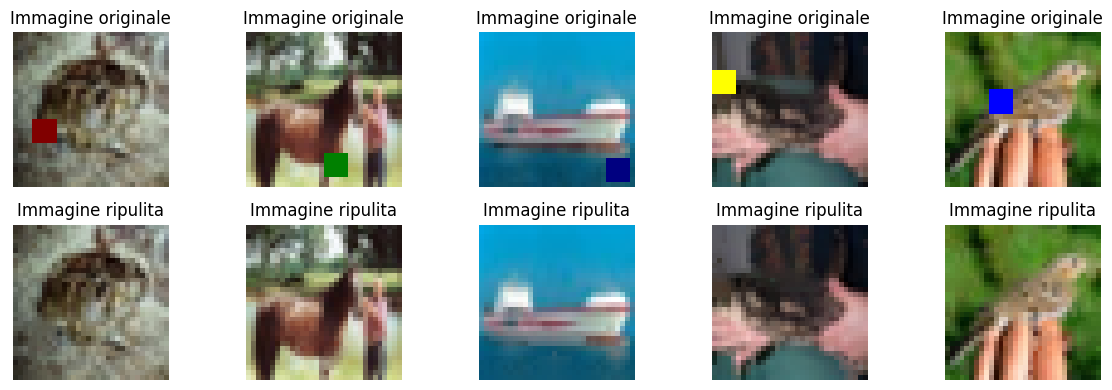

In [60]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_raw[i])
    plt.title("Immagine originale")
    plt.axis("off")

    plt.subplot(2, 5, i + 6)
    plt.imshow(x_train_pulito[i])
    plt.title("Immagine ripulita")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
epochs_without_improvement = 0
early_stop_patience = 3
max_epochs = 50

# Inizializzazione del modello
modello = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)

for epoch in range(max_epochs):
    modello.fit(x_train, y_train)

    y_val_pred = modello.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Epoca {epoch+1}: Accuracy su validazione = {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = modello
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= early_stop_patience:
        print("Arresto anticipato.")
        break

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoca 1: Accuracy su validazione = 0.4177
Epoca 2: Accuracy su validazione = 0.4373


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoca 3: Accuracy su validazione = 0.4460


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoca 4: Accuracy su validazione = 0.4452


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoca 5: Accuracy su validazione = 0.4421


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoca 6: Accuracy su validazione = 0.4457
Arresto anticipato.


In [62]:
# Accuracy finale sul test set
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy sul test set: {test_accuracy:.4f}")

Accuracy sul test set: 0.4526


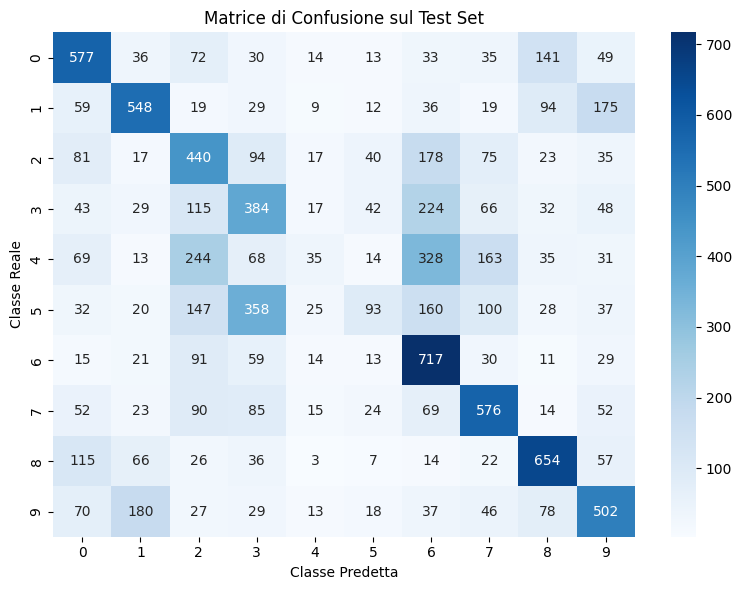

In [63]:
# Calcolo della matrice di confusione
matrice_confusione = confusion_matrix(y_test, y_test_pred)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusione, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Classe Predetta")
plt.ylabel("Classe Reale")
plt.title("Matrice di Confusione sul Test Set")
plt.tight_layout()
plt.show()

In [64]:
# 1. Preprocessamento delle immagini (da 0-255 a [-1, 1] e flatten)
def preprocessa_numpy(x):
    x = x.astype(np.float32) / 255 * 2 - 1
    return x.reshape(x.shape[0], -1)

x_train = preprocessa_numpy(x_train_pulito)
x_val = preprocessa_numpy(x_val_pulito)
x_test = preprocessa_numpy(x_test_pulito)

# 2. Reti MLP come estrattore di feature (probabilità)
mlp = MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=100, random_state=42)
mlp.fit(x_train, y_train)

# 3. Estrazione delle feature tramite probabilità
train_features = mlp.predict_proba(x_train)
val_features = mlp.predict_proba(x_val)
test_features = mlp.predict_proba(x_test)

# 4. Classificatore Boosting su queste feature
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Per evitare warning
xgb.fit(train_features, y_train)

# 5. Predizione e valutazione
y_pred = xgb.predict(test_features)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.4814


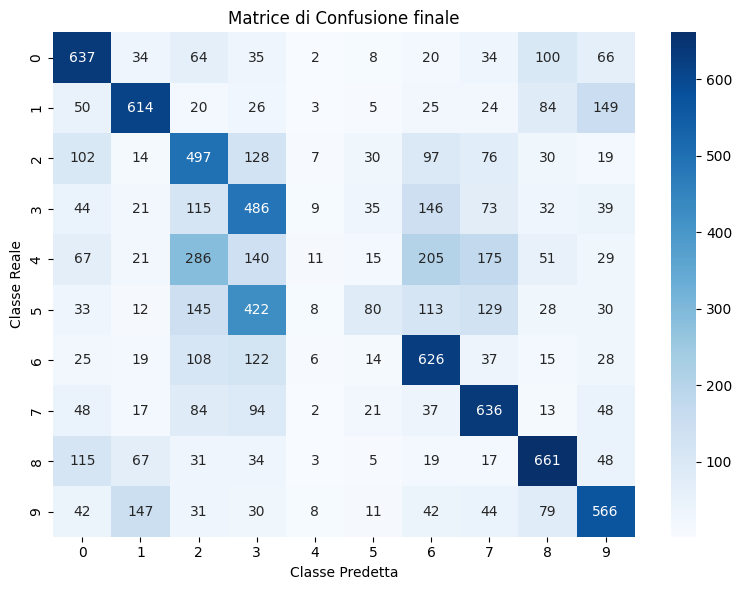

In [65]:
# Matrice di confusione finale
matrice_confusione = confusion_matrix(y_test, y_pred)

# Visualizzazione
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusione, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Classe Predetta")
plt.ylabel("Classe Reale")
plt.title("Matrice di Confusione finale")
plt.tight_layout()
plt.show()